# Modeling the Expert: An Introduction to Logistic Regression

<img src="images/GoodCarePoorCare.png"/>

### Read in Dataset

In [1]:
quality = read.csv("data/quality.csv")
head(quality)

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<lgl>,<int>,<int>
1,1,0,0,18,1,731,10,18,21,93,222,FALSE,0,0
2,2,1,1,6,1,411,0,8,27,19,115,FALSE,1,0
3,3,0,0,5,3,731,10,5,16,27,148,FALSE,5,0
4,4,0,1,19,0,158,34,20,14,59,242,FALSE,0,0
5,5,8,2,19,3,449,10,29,24,51,204,FALSE,0,0
6,6,2,0,9,2,731,6,11,40,53,156,FALSE,4,1


In [2]:
str(quality)

'data.frame':	131 obs. of  14 variables:
 $ MemberID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ InpatientDays       : int  0 1 0 0 8 2 16 2 2 4 ...
 $ ERVisits            : int  0 1 0 1 2 0 1 0 1 2 ...
 $ OfficeVisits        : int  18 6 5 19 19 9 8 8 4 0 ...
 $ Narcotics           : int  1 1 3 0 3 2 1 0 3 2 ...
 $ DaysSinceLastERVisit: num  731 411 731 158 449 ...
 $ Pain                : int  10 0 10 34 10 6 4 5 5 2 ...
 $ TotalVisits         : int  18 8 5 20 29 11 25 10 7 6 ...
 $ ProviderCount       : int  21 27 16 14 24 40 19 11 28 21 ...
 $ MedicalClaims       : int  93 19 27 59 51 53 40 28 20 17 ...
 $ ClaimLines          : int  222 115 148 242 204 156 261 87 98 66 ...
 $ StartedOnCombination: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ AcuteDrugGapSmall   : int  0 1 5 0 0 4 0 0 0 0 ...
 $ PoorCare            : int  0 0 0 0 0 1 0 0 1 0 ...


In [3]:
summary(quality)

    MemberID     InpatientDays       ERVisits       OfficeVisits  
 Min.   :  1.0   Min.   : 0.000   Min.   : 0.000   Min.   : 0.00  
 1st Qu.: 33.5   1st Qu.: 0.000   1st Qu.: 0.000   1st Qu.: 7.00  
 Median : 66.0   Median : 0.000   Median : 1.000   Median :12.00  
 Mean   : 66.0   Mean   : 2.718   Mean   : 1.496   Mean   :13.23  
 3rd Qu.: 98.5   3rd Qu.: 3.000   3rd Qu.: 2.000   3rd Qu.:18.50  
 Max.   :131.0   Max.   :30.000   Max.   :11.000   Max.   :46.00  
   Narcotics      DaysSinceLastERVisit      Pain         TotalVisits   
 Min.   : 0.000   Min.   :  6.0        Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 0.000   1st Qu.:207.0        1st Qu.:  1.00   1st Qu.: 8.00  
 Median : 1.000   Median :641.0        Median :  8.00   Median :15.00  
 Mean   : 4.573   Mean   :480.6        Mean   : 15.56   Mean   :17.44  
 3rd Qu.: 3.000   3rd Qu.:731.0        3rd Qu.: 23.00   3rd Qu.:22.50  
 Max.   :59.000   Max.   :731.0        Max.   :104.00   Max.   :69.00  
 ProviderCount   MedicalCla

In [4]:
table(quality$PoorCare)


 0  1 
98 33 

Where:

    O is GoodCare

    1 is PoorCare

#### Baseline accuracy

In [5]:
98/131

[1] 0.7480916

#### Library "caTools"

In [6]:
#install.packages("caTools")
library(caTools)

#### Randomly split data

In [7]:
set.seed(88)
# 75% in training set and 25% in testing set
split = sample.split(quality$PoorCare, SplitRatio = 0.75)
split

[1]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE
 [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [25] FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE
 [37] FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
 [49] FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
[109]  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
[121] FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE

TRUE means that we should put that observation in the training set, and FALSE means that we should put that observation in the testing set.

#### Create training and testing sets

In [8]:
qualityTrain = subset(quality, split == TRUE)
qualityTest = subset(quality, split == FALSE)

In [9]:
nrow(qualityTrain)
nrow(qualityTest)

[1] 99

[1] 32

#### Logistic Regression Model

In [10]:
# glm = generalized linear model
QualityLog = glm(PoorCare ~ OfficeVisits + Narcotics, data=qualityTrain, family=binomial)

We start with the dependent variable, and then the tilde sign, and then the independent variables we want to use separated by the plus sign.

The *family=binomial* tells the glm function to build a logistic regression model.

In [11]:
summary(QualityLog)


Call:
glm(formula = PoorCare ~ OfficeVisits + Narcotics, family = binomial, 
    data = qualityTrain)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.06303  -0.63155  -0.50503  -0.09689   2.16686  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.64613    0.52357  -5.054 4.33e-07 ***
OfficeVisits  0.08212    0.03055   2.688  0.00718 ** 
Narcotics     0.07630    0.03205   2.381  0.01728 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 111.888  on 98  degrees of freedom
Residual deviance:  89.127  on 96  degrees of freedom
AIC: 95.127

Number of Fisher Scoring iterations: 4


**Note:** We see here that the coefficients for OfficeVisits and Narcotics are both positive, which means that higher values in these two variables are indicative of poor care as we suspected from looking at the data.

We also see that both of these variables have at least one star, meaning that they're significant in our model.

The **AIC** value is a measure of the quality of the model. The preferred model is the one with the minimum AIC.

#### Make predictions on training set

In [12]:
predictTrain = predict(QualityLog, type="response")

*type="response"* tells the predict function to give us probabilities.

#### Analyze predictions

In [13]:
summary(predictTrain)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06623 0.11912 0.15967 0.25253 0.26765 0.98456 

In [14]:
tapply(predictTrain, qualityTrain$PoorCare, mean)

0         1 
0.1894512 0.4392246

This will compute the average prediction for each of the true outcomes. So we see that for all of the true poor care cases, we predict an average probability of about 0.44. And all of the true good care cases, we predict an average probability of about 0.19.

So this is a good sign, because it looks like we're predicting a higher probability for the actual poor care cases.

### Confusion matrix for threshold of 0.5

In [15]:
table(qualityTrain$PoorCare, predictTrain > 0.5)

   
    FALSE TRUE
  0    70    4
  1    15   10

The **rows** are labeled with the actual outcome, and the **columns** are labeled with the predicted outcome.

                Predict 0       Predict 1
    Actual 0    True Negative   False Positive
    Actual 1    False Negative  True Positive


Sensitivity = $\frac{TP}{TP + FN}$ (measures the percentage of actual poor care cases
that we classify correctly)

Specifity = $\frac{TN}{TN + FP}$ (measures the percentage of actual good care cases
that we classify correctly)

#### Sensitivity

In [16]:
10/25

[1] 0.4

#### Specificity

In [17]:
70/74

[1] 0.9459459

### Confusion matrix for threshold of 0.7

In [18]:
table(qualityTrain$PoorCare, predictTrain > 0.7)

   
    FALSE TRUE
  0    73    1
  1    17    8

#### Sensitivity

In [19]:
8/25

[1] 0.32

#### Specificity

In [20]:
73/74

[1] 0.9864865

So by **increasing the threshold**, our *sensitivity went down* and our *specificity went up*.

### Confusion matrix for threshold of 0.2

In [21]:
table(qualityTrain$PoorCare, predictTrain > 0.2)

   
    FALSE TRUE
  0    54   20
  1     9   16

#### Sensitivity

In [22]:
16/25

[1] 0.64

#### Specificity

In [23]:
54/74

[1] 0.7297297

So by **decreasing the threshold**, our *sensitivity went up* and our *specificity went down*.

Picking a good threshold value is often challenging. A **Receiver Operator Characteristic** curve, or ROC curve, can help you decide which value of the threshold is best.

### Install and load ROCR package

In [24]:
#install.packages("ROCR")
library(ROCR)

### Prediction function

In [25]:
ROCRpred = prediction(predictTrain, qualityTrain$PoorCare)

### Performance function

In [26]:
ROCRperf = performance(ROCRpred, "tpr", "fpr")

### Plot Relative Operating Characteristic (ROC) curve

The ROC curve captures all thresholds simultaneously.

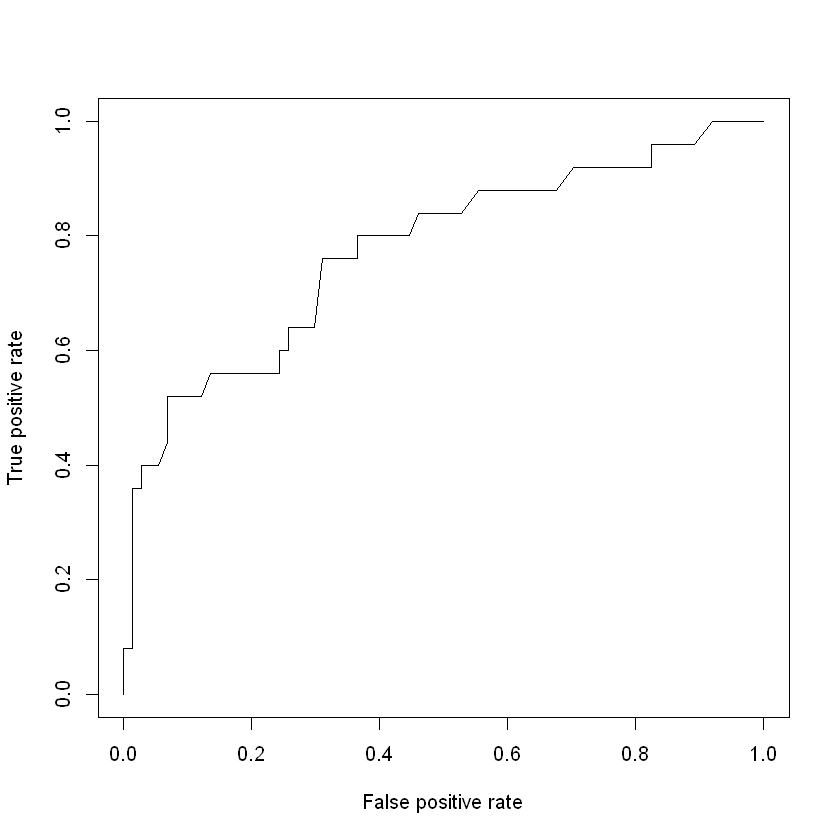

In [27]:
plot(ROCRperf)

At the point (0, 0.4), or about here, you're correctly labeling about 40% of the poor care cases with a very small false positive rate. 

On the other hand, at the point (0.6, 0.9), you're correctly labeling about 90% of the poor care cases, but have a false positive rate of 60%.

<img src="images/ROC.png"/>

If you're more concerned with having a high specificity or low false positive rate, pick the threshold that maximizes the true positive rate while keeping the false positive rate really low. A threshold around (0.1, 0.5) on this ROC curve looks like a good choice in this case.

On the other hand, if you're more concerned with having a high sensitivity or high true positive rate, pick a threshold that minimizes the false positive rate but has a very high true positive rate. A threshold around (0.3, 0.8) looks like a good choice in this case.

### Add colors

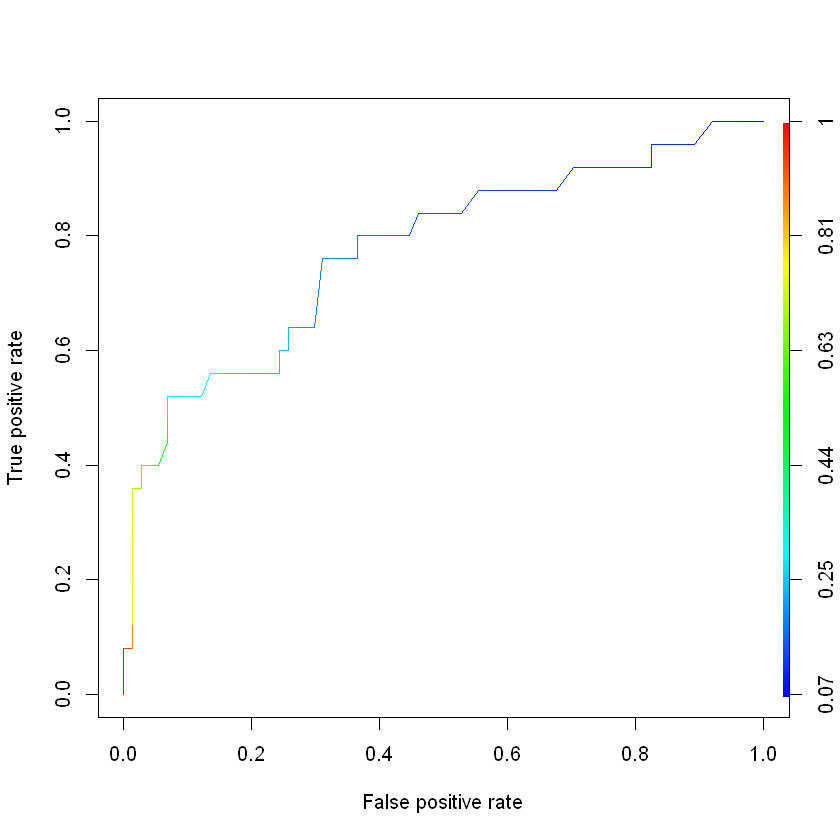

In [28]:
plot(ROCRperf, colorize=TRUE)

### Add threshold labels 

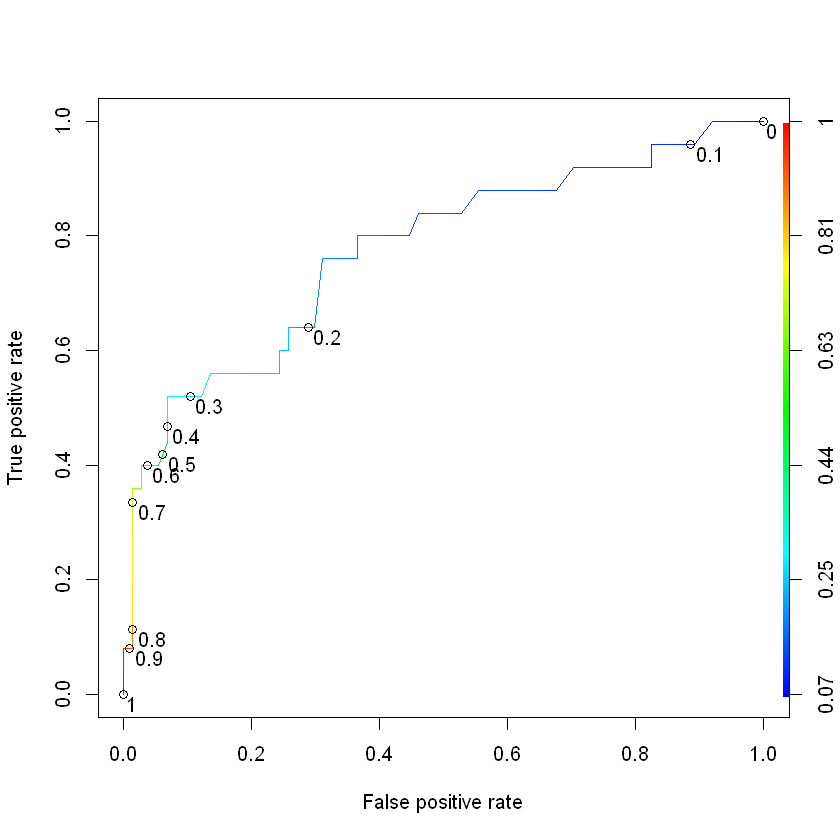

In [29]:
plot(ROCRperf, colorize=TRUE, print.cutoffs.at=seq(0,1,by=0.1), text.adj=c(-0.2,1.7))